In [1]:
import sys
sys.path.append('../..')
import cv2
import torchstain
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision import transforms
from PIL import Image
from src.transforms import ReinhardNotmalizer

In [2]:
src = "/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version/test/0_N/BRACS_264_N_1.png"
dst = "/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version/test/0_N/BRACS_1942_N_2.png"

In [24]:
src_img = cv2.imread(src)
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

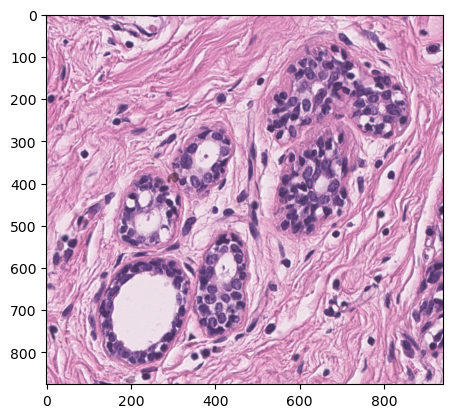

In [6]:
plt.imshow(src_img)

In [7]:
dst_img = cv2.imread(dst)
dst_img = cv2.cvtColor(dst_img, cv2.COLOR_BGR2RGB)

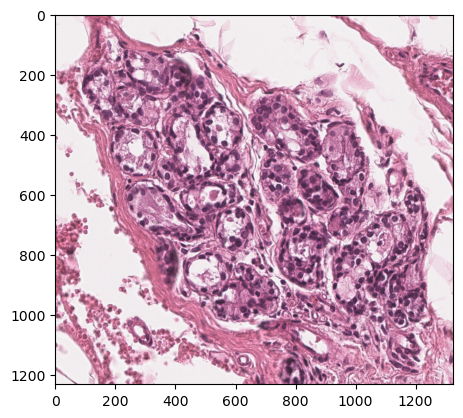

In [8]:
plt.imshow(dst_img)

In [9]:
T = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x*255)
])

In [10]:
torch_normalizer = torchstain.normalizers.MacenkoNormalizer(backend='torch')
torch_normalizer.fit(T(src_img))

In [11]:
t_to_transform = T(dst_img)
norm, H, E = torch_normalizer.normalize(I=t_to_transform, stains=True)

In [12]:
norm.shape, H.shape, E.shape

(torch.Size([1231, 1325, 3]),
 torch.Size([1231, 1325, 3]),
 torch.Size([1231, 1325, 3]))

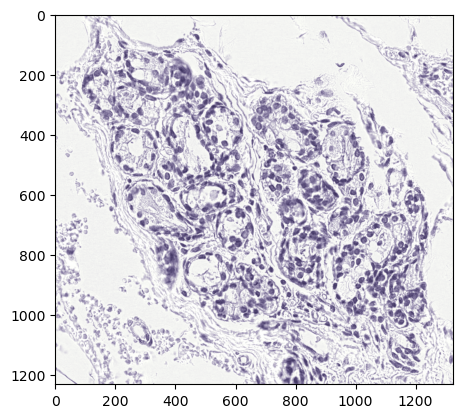

In [13]:
plt.imshow(H)

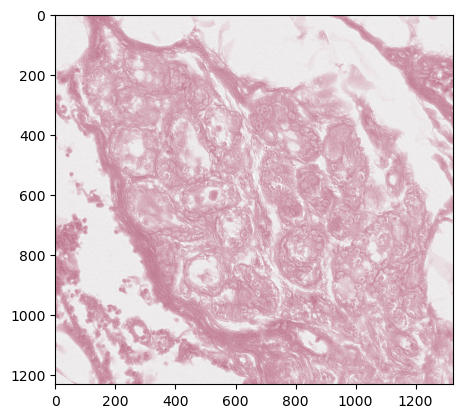

In [14]:
plt.imshow(E)

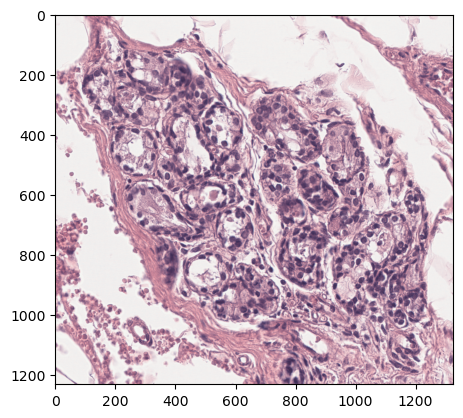

In [15]:
plt.imshow(norm)

In [16]:
paths = [
    "/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version/test/0_N/BRACS_1598_N_2.png",
    "/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version/test/0_N/BRACS_305_N_10.png",
    "/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version/test/1_PB/BRACS_1814_PB_3.png",
    "/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version/test/1_PB/BRACS_264_PB_19.png",
    "/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version/test/4_ADH/BRACS_1476_ADH_1.png",
    "/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version/test/5_DCIS/BRACS_286_DCIS_6.png",
    "/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version/test/6_IC/BRACS_1910_IC_1.png"
]

In [17]:
def read_imgs(paths : list[str]) -> list[np.ndarray]:

    imgs = []

    for path in paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        imgs.append(img)
    
    return imgs

In [18]:
imgs = read_imgs(paths)

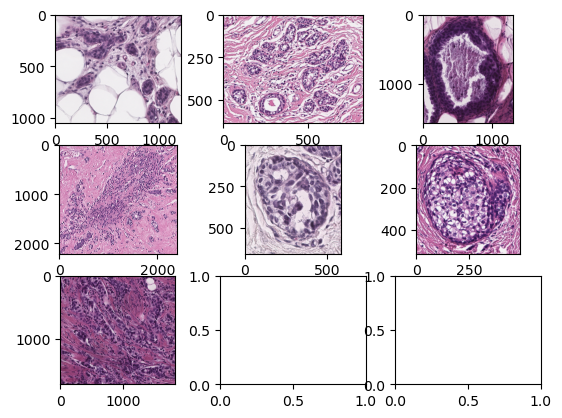

In [19]:
fig, axes = plt.subplots(nrows=3,ncols=3)

i = 0

for row in axes:

    for cell in row:

        cell.imshow(imgs[i])
        i += 1

        if i == len(imgs):
            break
    
    if i == len(imgs):
            break

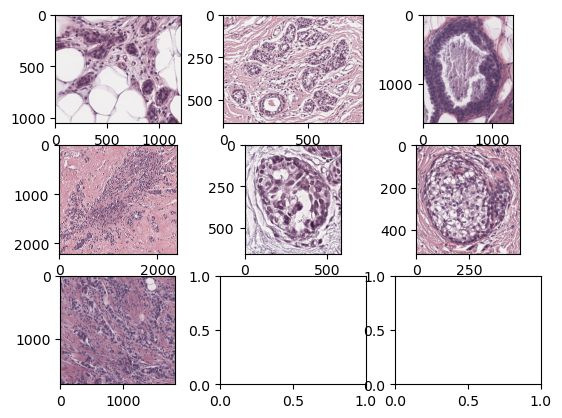

In [21]:
fig, axes = plt.subplots(nrows=3,ncols=3)

i = 0

for row in axes:

    for cell in row:

        norm, H, E = torch_normalizer.normalize(I=T(imgs[i]), stains=True)

        cell.imshow(norm)
        i += 1

        if i == len(imgs):
            break
    
    if i == len(imgs):
        break

### Reinhard normalization

In [201]:
normalizer = ReinhardNotmalizer(template_img_src=src)
normalizer.mean, normalizer.std

(array([173.24, 152.63, 114.97]), array([43.63,  8.48,  7.23]))

In [202]:
dst_img = Image.open(dst)

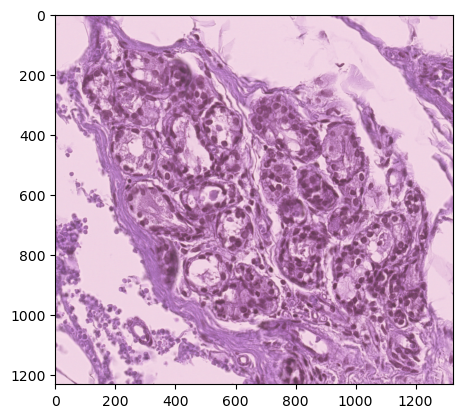

In [203]:
result = normalizer(dst_img)
plt.imshow(result)